<a href="https://colab.research.google.com/github/Maqsood8/G2M-Task/blob/main/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats                 

In [3]:
cab = pd.read_csv('Cab_Data.csv')
customer = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [7]:
cab.shape

(160149, 7)

In [8]:
cab.head( )  #print(cab.head)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
cab.tail()   #print(cab.tail)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
160144,10197520,42937,Yellow Cab,CHICAGO IL,14.84,312.29,211.9152
160145,10197521,42934,Yellow Cab,CHICAGO IL,3.21,50.39,41.2164
160146,10197522,42932,Yellow Cab,CHICAGO IL,37.44,655.81,507.6864
160147,10197523,42934,Yellow Cab,CHICAGO IL,32.13,541.98,458.8164
160148,10197524,42937,Yellow Cab,CHICAGO IL,NaN,NaN,NaN


In [10]:
cab.info()   #cab.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160149 entries, 0 to 160148
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  160149 non-null  int64  
 1   Date of Travel  160149 non-null  int64  
 2   Company         160149 non-null  object 
 3   City            160149 non-null  object 
 4   KM Travelled    160148 non-null  float64
 5   Price Charged   160148 non-null  float64
 6   Cost of Trip    160148 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 8.6+ MB


In [11]:
type(cab)    #print(type(cab))

pandas.core.frame.DataFrame

In [12]:
cab           #cab [2:5]                       
              #print(cab[2:5])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
160144,10197520,42937,Yellow Cab,CHICAGO IL,14.84,312.29,211.9152
160145,10197521,42934,Yellow Cab,CHICAGO IL,3.21,50.39,41.2164
160146,10197522,42932,Yellow Cab,CHICAGO IL,37.44,655.81,507.6864
160147,10197523,42934,Yellow Cab,CHICAGO IL,32.13,541.98,458.8164


In [13]:
cab.columns                             

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [14]:
cab['Date of Travel']     #cab[cab['Date of Travel']==42380]
                          #cab[cab ['KM Travelled']<30]
                          #cab.drop(['KM Travelled'],axis=1)
                          #print (cab)

0         42377
1         42375
2         42371
3         42376
4         42372
          ...  
160144    42937
160145    42934
160146    42932
160147    42934
160148    42937
Name: Date of Travel, Length: 160149, dtype: int64

In [15]:
cab['Date of Travel'].min()

42371

In [16]:

cab['Date of Travel'].max()

42941

In [17]:
#Time period of data is till 31/12/2018 from 31/01/2016                
import datetime
#datetime.date(2016,1,31)-datetime.timedelta(days=42371)               #for understaning
datetime.date(1899,12,29)+datetime.timedelta(days=42371)

datetime.date(2016, 1, 1)

In [18]:
from datetime import datetime, timedelta
def dateReformation(dateInt):
    date=datetime.strftime(datetime(1899,12,29)+timedelta(days=dateInt),'%d-%m-%Y')
    return date

dateReformation(42371)

'01-01-2016'

In [19]:
cab['Date of Travel']=cab['Date of Travel'].apply(lambda dt: dateReformation(dt))  

In [20]:
cab.describe(include='all')  

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,1.601490e+05,160149,160149,160149,160148.000000,160148.000000,160148.000000
unique,NaN,571,2,19,NaN,NaN,NaN
top,NaN,16-12-2016,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,979,123670,42423,NaN,NaN,NaN
mean,1.009901e+07,NaN,NaN,NaN,22.575858,439.001196,286.732840
std,5.652898e+04,NaN,NaN,NaN,12.228186,288.621912,158.141157
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000
25%,1.005062e+07,NaN,NaN,NaN,12.000000,212.240000,151.512000
50%,1.009907e+07,NaN,NaN,NaN,22.470000,396.645000,282.828000
75%,1.014750e+07,NaN,NaN,NaN,32.960000,604.062500,414.720000


In [21]:
cab['Date of Travel'].min()

'01-01-2016'

In [22]:

cab['Date of Travel'].max()

'31-12-2016'

In [23]:
cabdate = cab.set_index('Date of Travel')

In [24]:
cabdate

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip
Date of Travel,,,,,,
07-01-2016,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
05-01-2016,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
01-01-2016,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
06-01-2016,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
02-01-2016,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...
20-07-2017,10197520,Yellow Cab,CHICAGO IL,14.84,312.29,211.9152
17-07-2017,10197521,Yellow Cab,CHICAGO IL,3.21,50.39,41.2164
15-07-2017,10197522,Yellow Cab,CHICAGO IL,37.44,655.81,507.6864


In [25]:
#cities
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [26]:
city.shape

(20, 3)

In [27]:
# displays unique cities names count
city.nunique()

City          20
Population    20
Users         20
dtype: int64

In [28]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [29]:
#replace "," with space for numbers in population
city['Population']=city['Population'].str.replace(",","")
city['Users']=city['Users'].str.replace(",","")           
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [30]:
#Converting population and users to numeric values                          
city['Population']=pd.to_numeric(city['Population'])
city['Users']=pd.to_numeric(city['Users'])
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [31]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [32]:
#customers data 
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [33]:
customer.shape

(49171, 4)

In [34]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [36]:
#Transactions data
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [37]:
transaction.shape

(440098, 3)

In [38]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [39]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [40]:
#merging datas
#The city and cab dataset are related ,
#City Name in the city dataset is related to the city Name in the cab dataset.
merged_data=pd.merge(city,cab)

In [41]:
merged_data
print(merged_data)

               City  Population   Users  Transaction ID Date of Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10000140     08-01-2016   
2       NEW YORK NY     8405837  302149        10000141     05-01-2016   
3       NEW YORK NY     8405837  302149        10000142     03-01-2016   
4       NEW YORK NY     8405837  302149        10000143     08-01-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10197460     20-07-2017   
160145    BOSTON MA      248968   80021        10197461     15-07-2017   
160146    BOSTON MA      248968   80021        10197462     19-07-2017   
160147    BOSTON MA      248968   80021        10197463     22-07-2017   
160148    BOSTON MA      248968   80021        10197464     24-07-2017   

           Company  KM Travelled  Price Charged  Cost of Trip  
0         Pink Cab         17.85         242.90

In [42]:
#cab.shape
#city.shape
merged_data.shape

(160149, 9)

In [43]:
#The customers dataset and transactions datasets are related through the Customer ID
merged_data = pd.merge(merged_data, transaction)

In [44]:
merged_data
print(merged_data)

               City  Population   Users  Transaction ID Date of Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10000140     08-01-2016   
2       NEW YORK NY     8405837  302149        10000141     05-01-2016   
3       NEW YORK NY     8405837  302149        10000142     03-01-2016   
4       NEW YORK NY     8405837  302149        10000143     08-01-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10197460     20-07-2017   
160145    BOSTON MA      248968   80021        10197461     15-07-2017   
160146    BOSTON MA      248968   80021        10197462     19-07-2017   
160147    BOSTON MA      248968   80021        10197463     22-07-2017   
160148    BOSTON MA      248968   80021        10197464     24-07-2017   

           Company  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
0         Pink Cab         17.85 

In [45]:
merged_data.shape

(160149, 11)

In [46]:
#The tranactions dataset and the customer datasest are related through the Transaction ID
merged_data = pd.merge(merged_data,customer )

In [47]:
merged_data
print(merged_data)

               City  Population   Users  Transaction ID Date of Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10006684     04-02-2016   
2       NEW YORK NY     8405837  302149        10015798     12-03-2016   
3       NEW YORK NY     8405837  302149        10074689     07-09-2016   
4       NEW YORK NY     8405837  302149        10078883     17-09-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10194731     17-07-2017   
160145    BOSTON MA      248968   80021        10194754     11-07-2017   
160146    BOSTON MA      248968   80021        10196584     17-07-2017   
160147    BOSTON MA      248968   80021        10197378     20-07-2017   
160148    BOSTON MA      248968   80021        10197438     20-07-2017   

           Company  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
0         Pink Cab         17.85 

In [48]:

merged_data.shape

(160149, 14)

In [49]:
#replace "," with space for numbers in population
#city['Population']=city['Population'].str.replace(",","")
#city['Users']=city['Users'].str.replace(",","")           
#city

In [50]:
merged_data.columns=merged_data.columns.str.replace(" ","_")            
merged_data
print(merged_data)

               City  Population   Users  Transaction_ID Date_of_Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10006684     04-02-2016   
2       NEW YORK NY     8405837  302149        10015798     12-03-2016   
3       NEW YORK NY     8405837  302149        10074689     07-09-2016   
4       NEW YORK NY     8405837  302149        10078883     17-09-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10194731     17-07-2017   
160145    BOSTON MA      248968   80021        10194754     11-07-2017   
160146    BOSTON MA      248968   80021        10196584     17-07-2017   
160147    BOSTON MA      248968   80021        10197378     20-07-2017   
160148    BOSTON MA      248968   80021        10197438     20-07-2017   

           Company  KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID  \
0         Pink Cab         17.85 

In [51]:
#find duplicates
merged_data[merged_data.duplicated()]                                   

,City,Population,Users,Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)


In [52]:
merged_data.isnull().sum().sort_values(ascending=False)                 

KM_Travelled          1
Price_Charged         1
Cost_of_Trip          1
City                  0
Population            0
Users                 0
Transaction_ID        0
Date_of_Travel        0
Company               0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [53]:
#feature transformation                                                 
#returns month of date
merged_data['Month']=pd.DatetimeIndex(merged_data['Date_of_Travel']).month
#returns day of datetime
merged_data['Day']=pd.DatetimeIndex(merged_data['Date_of_Travel']).day
#returns year of datetime
merged_data['Year']=pd.DatetimeIndex(merged_data['Date_of_Travel']).year
#returns week of datetime
merged_data['Year_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).week
#returns day week of date time with Monday=0 and sunday=6
merged_data['Day_week']=pd.DatetimeIndex(merged_data['Date_of_Travel']).dayofweek
#returns quarter of date time
merged_data['Quarter']=pd.DatetimeIndex(merged_data['Date_of_Travel']).quarter

merged_data
print(merged_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if __name__ == '__main__':


               City  Population   Users  Transaction_ID Date_of_Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10006684     04-02-2016   
2       NEW YORK NY     8405837  302149        10015798     12-03-2016   
3       NEW YORK NY     8405837  302149        10074689     07-09-2016   
4       NEW YORK NY     8405837  302149        10078883     17-09-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10194731     17-07-2017   
160145    BOSTON MA      248968   80021        10194754     11-07-2017   
160146    BOSTON MA      248968   80021        10196584     17-07-2017   
160147    BOSTON MA      248968   80021        10197378     20-07-2017   
160148    BOSTON MA      248968   80021        10197438     20-07-2017   

           Company  KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID  \
0         Pink Cab         17.85 

In [54]:
merged_data.shape

(160149, 20)

In [55]:
#generating a new profit column from subtracting the price charged -cost of trip
merged_data['Profit']=merged_data['Price_Charged']-merged_data['Cost_of_Trip']
merged_data
print(merged_data)

               City  Population   Users  Transaction_ID Date_of_Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10006684     04-02-2016   
2       NEW YORK NY     8405837  302149        10015798     12-03-2016   
3       NEW YORK NY     8405837  302149        10074689     07-09-2016   
4       NEW YORK NY     8405837  302149        10078883     17-09-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10194731     17-07-2017   
160145    BOSTON MA      248968   80021        10194754     11-07-2017   
160146    BOSTON MA      248968   80021        10196584     17-07-2017   
160147    BOSTON MA      248968   80021        10197378     20-07-2017   
160148    BOSTON MA      248968   80021        10197438     20-07-2017   

           Company  KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID  \
0         Pink Cab         17.85 

In [56]:
#Column created to check profit or loss from the ride (1 for profit and 0 for loss)
merged_data['Profited']=merged_data['Profit'].apply(lambda x: 1 if x>1 else 0)
merged_data
print(merged_data)

               City  Population   Users  Transaction_ID Date_of_Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10006684     04-02-2016   
2       NEW YORK NY     8405837  302149        10015798     12-03-2016   
3       NEW YORK NY     8405837  302149        10074689     07-09-2016   
4       NEW YORK NY     8405837  302149        10078883     17-09-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10194731     17-07-2017   
160145    BOSTON MA      248968   80021        10194754     11-07-2017   
160146    BOSTON MA      248968   80021        10196584     17-07-2017   
160147    BOSTON MA      248968   80021        10197378     20-07-2017   
160148    BOSTON MA      248968   80021        10197438     20-07-2017   

           Company  KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID  \
0         Pink Cab         17.85 

In [57]:
#create a column to generate the price/km and profit/km of each ride
merged_data['Price/KM']=merged_data['Price_Charged']/merged_data['KM_Travelled']
merged_data['Profit/KM']=merged_data['Profit']/merged_data['KM_Travelled']
merged_data
print(merged_data)

               City  Population   Users  Transaction_ID Date_of_Travel  \
0       NEW YORK NY     8405837  302149        10000139     07-01-2016   
1       NEW YORK NY     8405837  302149        10006684     04-02-2016   
2       NEW YORK NY     8405837  302149        10015798     12-03-2016   
3       NEW YORK NY     8405837  302149        10074689     07-09-2016   
4       NEW YORK NY     8405837  302149        10078883     17-09-2016   
...             ...         ...     ...             ...            ...   
160144    BOSTON MA      248968   80021        10194731     17-07-2017   
160145    BOSTON MA      248968   80021        10194754     11-07-2017   
160146    BOSTON MA      248968   80021        10196584     17-07-2017   
160147    BOSTON MA      248968   80021        10197378     20-07-2017   
160148    BOSTON MA      248968   80021        10197438     20-07-2017   

           Company  KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID  \
0         Pink Cab         17.85 

In [58]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160149 entries, 0 to 160148
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   City                160149 non-null  object 
 1   Population          160149 non-null  int64  
 2   Users               160149 non-null  int64  
 3   Transaction_ID      160149 non-null  int64  
 4   Date_of_Travel      160149 non-null  object 
 5   Company             160149 non-null  object 
 6   KM_Travelled        160148 non-null  float64
 7   Price_Charged       160148 non-null  float64
 8   Cost_of_Trip        160148 non-null  float64
 9   Customer_ID         160149 non-null  int64  
 10  Payment_Mode        160149 non-null  object 
 11  Gender              160149 non-null  object 
 12  Age                 160149 non-null  int64  
 13  Income_(USD/Month)  160149 non-null  int64  
 14  Month               160149 non-null  int64  
 15  Day                 160149 non-nul

In [59]:
# consider only numerical data
#select all the numerical columns
numerical_cols=merged_data.select_dtypes(exclude='object')
numerical_cols
print(numerical_cols)

        Population   Users  Transaction_ID  KM_Travelled  Price_Charged  \
0          8405837  302149        10000139         17.85         242.90   
1          8405837  302149        10006684         34.34        1099.35   
2          8405837  302149        10015798         19.20         559.30   
3          8405837  302149        10074689         14.84         322.28   
4          8405837  302149        10078883         37.08         728.27   
...            ...     ...             ...           ...            ...   
160144      248968   80021        10194731         39.78         515.32   
160145      248968   80021        10194754         12.35         158.32   
160146      248968   80021        10196584         15.21         195.02   
160147      248968   80021        10197378         27.44         390.80   
160148      248968   80021        10197438         14.14         229.39   

        Cost_of_Trip  Customer_ID  Age  Income_(USD/Month)  Month  Day  Year  \
0           198.135

In [60]:
#consider only object columns
object_cols=merged_data.select_dtypes(include='object')
object_cols

,City,Date_of_Travel,Company,Payment_Mode,Gender
0,NEW YORK NY,07-01-2016,Pink Cab,Cash,Male
1,NEW YORK NY,04-02-2016,Yellow Cab,Cash,Male
2,NEW YORK NY,12-03-2016,Yellow Cab,Card,Male
3,NEW YORK NY,07-09-2016,Yellow Cab,Card,Male
4,NEW YORK NY,17-09-2016,Pink Cab,Card,Male
...,...,...,...,...,...
160144,BOSTON MA,17-07-2017,Yellow Cab,Card,Female
160145,BOSTON MA,11-07-2017,Yellow Cab,Card,Male
160146,BOSTON MA,17-07-2017,Pink Cab,Cash,Female
160147,BOSTON MA,20-07-2017,Yellow Cab,Card,Male


In [61]:
# visualise data
from scipy import stats
import pprint                                            # use to print data structures in a readable, pretty way 
import warnings                                          # ignore warning messages                         
warnings.simplefilter(action='ignore', category=FutureWarning)   
sns.set_theme()                                          # function changes the global defaults for all plots using the 
                                                         # matplotlib rcParams system. The themeing is decomposed into several distinct sets of parameter values

In [62]:
#function to get quartile and descriptive statistics
def numericalAnalysis(datar,col):
    print(f"Quantile statistics of the column:{col}")
    print(f"Quantile1 is: {np.quantile(datar[col],.25)} ")
    print(f"Quantile2 is: {np.quantile(datar[col],.50)}")
    print(f"Quantile3 is: {np.quantile(datar[col],.75)}\n")
    print(f"The skewness of the column is {stats.skew(datar[col])}")
    print(f"The kurtosis of the column is {stats.kurtosis(datar[col])}\n")
    pprint.pprint(merged_data[col].describe())                              
    print("\n")

In [63]:
numericalAnalysis(numerical_cols,"KM_Travelled")

Quantile statistics of the column:KM_Travelled
Quantile1 is: nan 
Quantile2 is: nan
Quantile3 is: nan

The skewness of the column is nan
The kurtosis of the column is nan

count    160148.000000
mean         22.575858
std          12.228186
min           1.900000
25%          12.000000
50%          22.470000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64




In [64]:
#function to plot a boxplot and histogram of the distribution

def vizHist(datar,col,c):# plt.figure(figsize=(10,8))          
    sns.histplot(x=datar[col],bins=40, color=c, kde=True )     
    plt.title("Histogram of {}".format(col), fontsize=20)      
    plt.ylabel('Frequency')
    plt.xlabel(col)

def boxPlot(datar,col):# plt.figure(figsize=(10,8))
    print("Boxplot of {} ".format(col))
    sns.boxplot(datar[col])

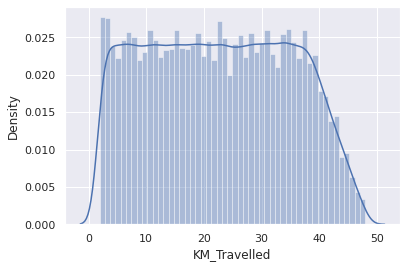

In [65]:
sns.distplot(merged_data ["KM_Travelled"])                 

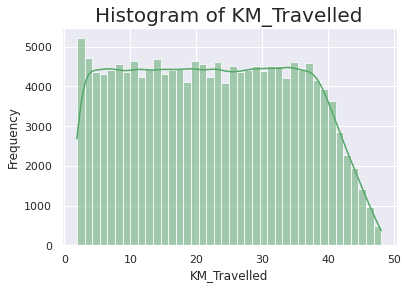

In [66]:
vizHist(numerical_cols,"KM_Travelled",'g')

Boxplot of KM_Travelled 


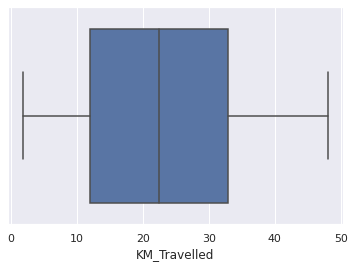

In [67]:
boxPlot(numerical_cols,'KM_Travelled')

In [68]:
# check for pricecharged
numericalAnalysis(merged_data,"Price_Charged")

Quantile statistics of the column:Price_Charged
Quantile1 is: nan 
Quantile2 is: nan
Quantile3 is: nan

The skewness of the column is nan
The kurtosis of the column is nan

count    160148.000000
mean        439.001196
std         288.621912
min          15.600000
25%         212.240000
50%         396.645000
75%         604.062500
max        2048.030000
Name: Price_Charged, dtype: float64




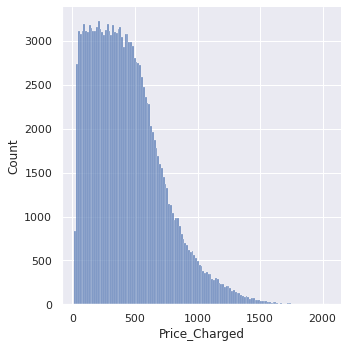

In [69]:
sns.displot(merged_data['Price_Charged'])

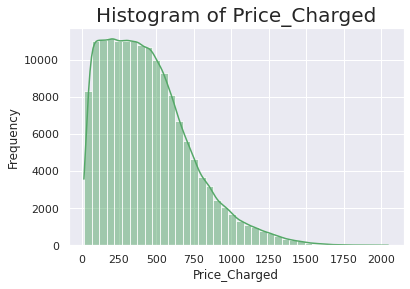

In [70]:
vizHist(merged_data,"Price_Charged",'g')

Boxplot of Price_Charged 


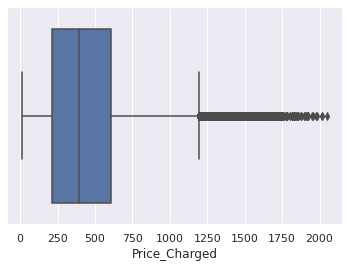

In [71]:
boxPlot(merged_data,'Price_Charged')

In [72]:
# Cost_of_Trip
numericalAnalysis(merged_data,"Cost_of_Trip")

Quantile statistics of the column:Cost_of_Trip
Quantile1 is: nan 
Quantile2 is: nan
Quantile3 is: nan

The skewness of the column is nan
The kurtosis of the column is nan

count    160148.000000
mean        286.732840
std         158.141157
min          19.000000
25%         151.512000
50%         282.828000
75%         414.720000
max         691.200000
Name: Cost_of_Trip, dtype: float64




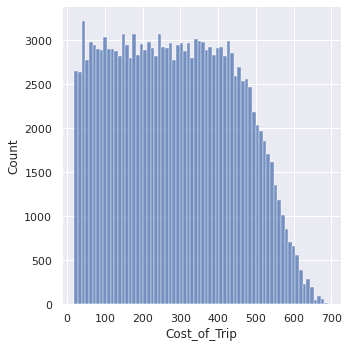

In [73]:
sns.displot(merged_data['Cost_of_Trip'])

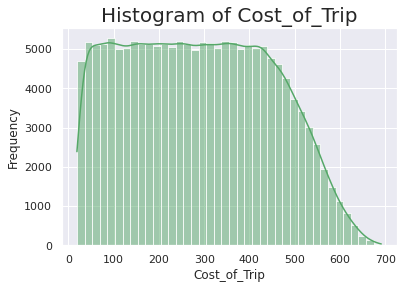

In [74]:
vizHist(merged_data,"Cost_of_Trip",'g')

Boxplot of Cost_of_Trip 


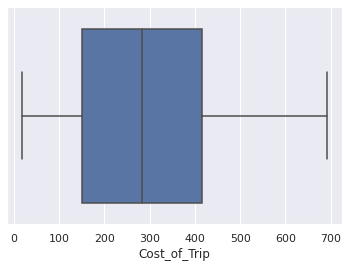

In [75]:
boxPlot(merged_data,'Cost_of_Trip')

In [76]:
# Age
numericalAnalysis(merged_data,"Age")

Quantile statistics of the column:Age
Quantile1 is: 25.0 
Quantile2 is: 33.0
Quantile3 is: 42.0

The skewness of the column is 0.6865709966617602
The kurtosis of the column is -0.46343027311699014

count    160149.000000
mean         35.352490
std          12.613946
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64




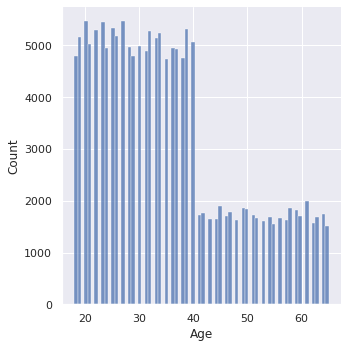

In [77]:
sns.displot(merged_data['Age'])

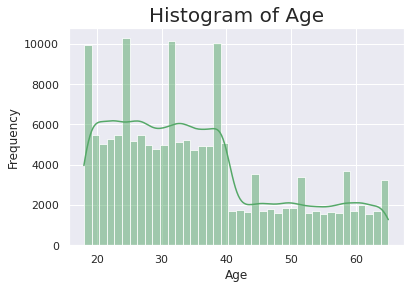

In [78]:
vizHist(merged_data,'Age','g')

Boxplot of Age 


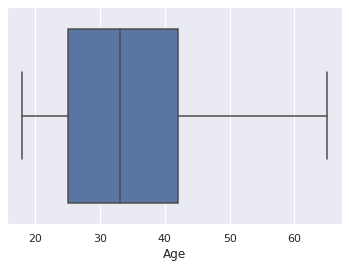

In [79]:
boxPlot(merged_data,'Age')

In [80]:
# income
numericalAnalysis(merged_data,'Income_(USD/Month)')

Quantile statistics of the column:Income_(USD/Month)
Quantile1 is: 8406.0 
Quantile2 is: 14692.0
Quantile3 is: 21038.0

The skewness of the column is 0.31048067502421733
The kurtosis of the column is -0.6587241546507405

count    160149.000000
mean      15058.443325
std        7988.722512
min        2000.000000
25%        8406.000000
50%       14692.000000
75%       21038.000000
max       35000.000000
Name: Income_(USD/Month), dtype: float64




In [ ]:
sns.displot(merged_data['Income_(USD/Month)'])

In [ ]:
vizHist(merged_data, 'Income_(USD/Month)','g')

In [ ]:
boxPlot(merged_data,'Income_(USD/Month)')

In [ ]:
# population
numericalAnalysis(city,'Population')

In [ ]:
sns.distplot(city['Population'])

In [ ]:
vizHist(merged_data, 'Population','g')

In [ ]:
boxPlot(city, 'Population')

In [ ]:
#Users
numericalAnalysis(city,'Users')

In [ ]:
sns.distplot(city['Users'])

In [ ]:
vizHist(merged_data, 'Users','g')

In [ ]:
boxPlot(city,'Users')

In [ ]:
merged_data.info()

In [ ]:
print(merged_data)

In [ ]:
#Day_week
plotter = merged_data.groupby(["Day_week","Company"]).Transaction_ID.count()       
plotter.unstack().plot(kind="line")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.ylabel("No.of Customers")
plt.title("Week Analysis")
print(plotter)

In [ ]:
#Day
plot1=merged_data.groupby("Day").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Day analysis")
plt.ylabel("No.of Customers")
plt.show()
print(plot1)

In [ ]:
plotter = merged_data.groupby(["Day","Company"]).Transaction_ID.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks(range(0,31))
plt.ylabel("No.of Customers")
plt.title("Day Analysis per Company")
print(plotter)

In [ ]:
plot1= merged_data[merged_data.Company == "Pink Cab"].groupby("Day").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.lineplot(x=plot1.index,y=plot1.values)
plt.title("Customers Analysis for Pink cab")
plt.ylabel("Number Of Rides")

In [ ]:
#Month
plot1=merged_data.groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Monthly Analysis")
plt.ylabel("No.of Customers")
plt.show()

In [ ]:
plotter = merged_data.groupby(["Month","Company"]).Transaction_ID.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks(range(1,12))
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

In [ ]:
#yellow cab monthly transaction id count is plotted
plot= merged_data[merged_data.Company == "Yellow Cab"].groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title("Customers Analysis for Yellow cab")
plt.ylabel("Number Of Customers")

In [ ]:
plt.figure(figsize=(14,6))
ax =plt.subplot(111)
ax.bar(plot4.index-0.2,plot4.values,width=0.4,color="Pink",align="center",label="Pink Cab")
ax.bar(plot5.index+0.2,plot5.values,width=0.4,color="Yellow",align="center",label="Yellow Cab")
plt.title("Transactions Per month ")
plt.ylabel("No. of Transactions")
#locs, labels = plt.xticks()
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=20)
plt.xlabel("Month")
plt.legend()

In [ ]:
#Year
plotter = merged_data.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(20,10))
plotter.unstack().plot(kind="bar")
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

In [ ]:
print(merged_data)



In [ ]:
#Year vs Users vs Company                                                        # 1 doubt users 
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Year'],y=merged_data['Users'],hue=merged_data['Company'],estimator=sum)

In [ ]:
merged_data.groupby(["Year","Company"]).Transaction_ID.count()

In [ ]:
plot2 =merged_data.groupby(["Year","Company"]).Transaction_ID.count()    
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Yearly Customer distribution")

In [ ]:
#Company Analysis
plot3=merged_data.groupby("Company").Transaction_ID.count()
plt.figure(figsize=(10,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
plot4= merged_data[merged_data.Company=="Pink Cab"].groupby("Month").Transaction_ID.count()
print("Pink cab monthly transaction info :", plot4)
plot5= merged_data[merged_data.Company=="Yellow Cab"].groupby("Month").Transaction_ID.count()
print("Yellow cab monthly transaction info :", plot5)

In [ ]:
plt.figure(figsize=(14,6))
ax =plt.subplot(111)
ax.bar(plot4.index-0.2,plot4.values,width=0.4,color="Pink",align="center",label="Pink Cab")
ax.bar(plot5.index+0.2,plot5.values,width=0.4,color="Yellow",align="center",label="Yellow Cab")
plt.title("Transactions Per month ")
plt.ylabel("No. of Transactions")
#locs, labels = plt.xticks()
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=20)
plt.xlabel("Month")
plt.legend()

In [ ]:
#customer gender analysis
#Company Analysis
plot3=merged_data.groupby("Gender").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Company'],y=merged_data['Users'],hue=merged_data['Gender'],estimator=sum)

In [ ]:
#Company Analysis
plot3=merged_data.groupby("Payment_Mode").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [ ]:
sns.scatterplot(y=city['Users'],x=city['Population'])

In [ ]:
merged_data.Profit.max()

In [ ]:
merged_data.Profit.min()

In [ ]:
sns.scatterplot(x=merged_data['KM_Travelled'],y=merged_data["Profit"])

In [ ]:
sns.scatterplot(x=merged_data['KM_Travelled'],y=merged_data["Profit"],hue=merged_data['Company'])

In [ ]:
merged_data.groupby(['Gender'])['Income_(USD/Month)'].mean()

In [ ]:
sns.catplot(x="Gender", y="Income_(USD/Month)", data=merged_data)

In [ ]:
#Age vs Income
sns.scatterplot(x=merged_data["Age"],y=merged_data["Income_(USD/Month)"])

In [ ]:
#income vs kms travelled
sns.scatterplot(x=merged_data["Income_(USD/Month)"],y=merged_data['KM_Travelled'])

In [ ]:
#Quarter vs profit
merged_data.groupby(['Quarter'])["Profit"].mean()

In [ ]:
merged_data.groupby(['Quarter','Year'])["Profit"].sum()

In [ ]:
#Quarters vs KM Travelled
merged_data.groupby(['Quarter'])['KM_Travelled'].median()

In [ ]:
merged_data.groupby(['Quarter'])['KM_Travelled'].mean()

In [ ]:
merged_data.groupby(['Quarter'])['KM_Travelled'].sum()

In [ ]:
quarterDistance=merged_data.groupby('Quarter')['KM_Travelled'].sum()
quarterDistance=pd.DataFrame(quarterDistance)
quarterDistance=quarterDistance.sort_values(by='KM_Travelled',ascending=False)
# plt.figure(figsize=(10,10))

quarterDistance.plot.bar(color='green',linewidth=1.5,figsize=(8,8))
plt.xticks()
plt.ylabel('KM Travelled')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Quarter")

In [ ]:
merged_data.groupby(['KM_Travelled','Company'])['Users'].count()

In [ ]:
merged_data.info()

In [ ]:
merged_data.groupby(['Day_week'])['KM_Travelled'].median()

In [ ]:
merged_data.groupby(['Day_week'])['KM_Travelled'].sum()

In [ ]:
dayDistance=merged_data.groupby('Day_week')['KM_Travelled'].sum()
dayDistance=pd.DataFrame(dayDistance)
dayDistance=dayDistance.sort_values(by='KM_Travelled',ascending=False)
# plt.figure(figsize=(10,10))

dayDistance.plot.bar(color='blue',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Number of KMs')
plt.xlabel("Year")
plt.title("Number of KM Travelled per Day")

In [ ]:
sns.barplot(x="Day_week", y="Profit", data=merged_data)

In [ ]:
merged_data.groupby(['Day_week','Users'])['Profit'].sum()

In [ ]:
sns.catplot(x="Company", y="Profit", data=merged_data)

In [ ]:
merged_data.groupby(['Company'])['Profit'].mean()

In [ ]:
merged_data.groupby(['Company'])['Profit'].sum()

In [ ]:
#monthly profit
merged_data.groupby(['Month'])['Profit'].sum()

In [ ]:
sns.barplot(x="Year",y= 'Profit', data = merged_data)

In [ ]:
sns.barplot(x="Month", y="Profit", data=merged_data)

In [ ]:
monthRev=merged_data.groupby('Month')['Price_Charged'].sum()
monthRev=pd.DataFrame(monthRev)
monthRev=monthRev.sort_values(by='Price_Charged',ascending=False)
# plt.figure(figsize=(10,10))

monthRev.plot.bar(color='seagreen',linewidth=1,figsize=(8,8))
plt.xticks(rotation=90)
plt.ylabel('Revenue in $Millions')
plt.xlabel("Month")
plt.title("Revenue Per Month")

In [ ]:
#revenue permonth for yellow cab
yellowCab=merged_data[merged_data['Company']=="Yellow Cab"]
sns.barplot(x=yellowCab['Month'],y=yellowCab['Cost_of_Trip'],estimator=sum)
plt.title("Revenue Per Month for YellowCab")

In [ ]:
#revenue per month for pink cab
PinkCab=merged_data[merged_data['Company']=="Pink Cab"]
sns.barplot(x=PinkCab['Month'],y=PinkCab['Cost_of_Trip'],estimator=sum)
plt.title("Revenue Per Month for Pink cab")

In [ ]:
#city vs profit
merged_data.groupby(['City'])['Profit'].sum().sort_values(ascending=False)

In [ ]:
merged_data.groupby(['Company'])['Profit/KM'].sum().sort_values(ascending=False)

In [ ]:
cityProfit=merged_data.groupby('City').Profit.sum()
cityProfit=pd.DataFrame(cityProfit)
cityProfit=cityProfit.sort_values(by='Profit',ascending=False)
plt.figure(figsize=(8,8))

cityProfit.plot.bar(color='red',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Cities")
plt.title("Proifits per each City")

In [ ]:
plt.figure(figsize=(30,7))
sns.barplot(x=merged_data["City"],y=merged_data['Profit'],estimator=sum)
plt.xticks()

Text(0.5, 1.0, 'Profits Per Month for Yellow Company')

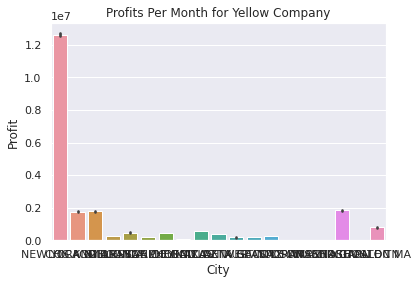

In [124]:
#profit per city for each company
sns.barplot(x=yellowCab['City'],y=yellowCab['Profit'],estimator=sum)
plt.xticks()
plt.title("Profits Per Month for Yellow Company")

Text(0.5, 1.0, 'Profit for Pink Company')

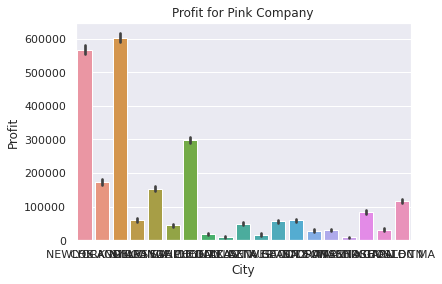

In [125]:
sns.barplot(x=PinkCab['City'],y=PinkCab['Profit'],estimator=sum)
plt.xticks()
plt.title("Profit for Pink Company")

In [126]:
merged_data.groupby(['Year'])['Profit'].sum()

Year
2016    1.581377e+07
2017    8.571704e+06
Name: Profit, dtype: float64

In [127]:
data2016=merged_data.loc[merged_data['Year']==2016]
data2017=merged_data.loc[merged_data['Year']==2017]
data2018=merged_data.loc[merged_data['Year']==2018]
profit2016=round(data2016['Profit'].sum())
profit2017=round(data2017['Profit'].sum())
profit2018=round(data2018['Profit'].sum())
# sns.lineplot(x=data['Year'],y=data['Profit'])

In [ ]:
pd1=pd.DataFrame(data=[profit2018,profit2017,profit2016],columns=["Profit"],index=[2018,2017,2016])
pd1

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(y=pd1['Profit'],x=pd1.index)

In [ ]:
yearlyProfit=merged_data.groupby('Year').Profit.sum()
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Profit',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot.bar(color='cyan',linewidth=1,figsize=(8,8))
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

In [ ]:
yearlyProfit=merged_data.groupby(['Year','Company'])['Profit'].sum().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Year',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar')
plt.xticks()
plt.ylabel('Profit in $Millions')
plt.xlabel("Year")
plt.title("Proifits per Year")

In [ ]:
yearlyProfit=merged_data.groupby(['Year','Company'])['Profit/KM'].mean().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Year',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar',stacked=True)
plt.xticks()
plt.ylabel('Average Profit Per KM')
plt.xlabel("Year")
plt.title("Avg Proifits per KM")

In [ ]:
yearlyProfit=merged_data.groupby(['Company','Year','Gender'])['Profit'].sum().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Company',ascending=False)


yearlyProfit.plot(kind= 'bar',figsize=(20,10))
plt.xticks(rotation = 360)
plt.ylabel('Profit in $Millions')
plt.xlabel("Company and Year")
plt.title("Proifits per Year per Gender for each company")

In [ ]:
yearlyProfit=merged_data.groupby(['Company','Year','Gender'])['Gender'].count().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='Company',ascending=False)


yearlyProfit.plot(kind= 'bar',figsize=(20,10))
plt.xticks(rotation = 360)
plt.ylabel('Customer distribution')
plt.xlabel("Company and Year")
plt.title("Customer base analysis Year per Gender for each company")

In [ ]:
merged_data.groupby(['Company','Payment_Mode'])['Profit'].sum()

In [ ]:
#profit vs card or cash
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Payment_Mode'])["Profit"].sum()
sns.barplot(x=merged_data['Payment_Mode'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

In [ ]:
#profit vs Quarter 
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Quarter'])["Profit"].sum()
sns.barplot(x=merged_data['Quarter'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

In [ ]:
#profit vs Quarter 
plt.figure(figsize=(10,10))
plt.xticks()
merged_data.groupby(['Company','Day_week'])["Profit"].sum()
sns.barplot(x=merged_data['Day_week'],y=merged_data['Profit'],hue=merged_data['Company'],estimator=sum)

In [ ]:
#Company vs Income vs Year
plt.figure(figsize=(10,10))
plt.xticks()
sns.barplot(x=merged_data['Company'],y=merged_data['Income_(USD/Month)'],hue=merged_data['Year'],estimator=sum)

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Income_(USD/Month)']>2500) & (merged_data['Income_(USD/Month)']<15000)].groupby(['Year','Company'])['Company'].count()

data1 = merged_data[(merged_data['Income_(USD/Month)']<2500)].groupby(['Year','Company'])['Company'].count()
data2 = merged_data[(merged_data['Income_(USD/Month)']>15000)].groupby(['Year','Company'])['Company'].count()

df=pd.DataFrame({'>15000':data2, '<2500':data1, '2500-15000':data3})
ax = df.plot(kind='bar', stacked=True, width = 1)
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Income wise customer basis analysis year wise and company wise")

plt.show()

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Income_(USD/Month)']>2500) & (merged_data['Income_(USD/Month)']<15000)].groupby(['Company'])['Users'].count()

data1 = merged_data[(merged_data['Income_(USD/Month)']<2500)].groupby(['Company'])['Users'].count()
data2 = merged_data[(merged_data['Income_(USD/Month)']>15000)].groupby(['Company'])['Users'].count()

df=pd.DataFrame({'>15000':data2, '<2500':data1, '2500-15000':data3})
ax = df.plot(kind='bar', stacked=True, width = 0.35)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=360)
plt.ylabel(' Users Count')
plt.xlabel("Company")
plt.title("Customers with varied income sources for different companies")
plt.show()

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Age']>18) & (merged_data['Age']<=25)].groupby(['Year','Company'])['Profit'].sum()

data1 = merged_data[(merged_data['Age']>26) & (merged_data['Age']<=40)].groupby(['Year','Company'])['Profit'].sum()
data2 = merged_data[(merged_data['Age']>41) & (merged_data['Age']<=60)].groupby(['Year','Company'])['Profit'].sum()
data4 = merged_data[(merged_data['Age']>41)].groupby(['Year','Company'])['Profit'].sum()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Profit share by age group")
plt.ylabel(' Profit')
plt.show()

In [ ]:
import pandas as pd
data3 = merged_data[(merged_data['Age']>18) & (merged_data['Age']<=25)].groupby(['Year','Company'])['Users'].sum()

data1 = merged_data[(merged_data['Age']>26) & (merged_data['Age']<=40)].groupby(['Year','Company'])['Users'].sum()
data2 = merged_data[(merged_data['Age']>41) & (merged_data['Age']<=60)].groupby(['Year','Company'])['Users'].sum()
data4 = merged_data[(merged_data['Age']>41)].groupby(['Year','Company'])['Users'].sum()
df=pd.DataFrame({'60+':data4,'41-60':data2,'26-40':data1,'18-25':data3 })
ax = df.plot(kind='bar', stacked=True, width = 0.55)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
#ax.set_xticklabels(Class,rotation='horizontal')
plt.title("Customer segmentation by age group")
plt.ylabel(' Customers')
plt.show()

In [ ]:
import pandas as pd
data1 = merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['City'])['Users'].count()
data2 = merged_data[(merged_data['Company']=="Pink Cab")].groupby(['City'])['Users'].count()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.85)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=90)
plt.ylabel(' Users Count')
plt.xlabel("Cities")
plt.title("Users Covered by company")
plt.show()

In [ ]:
cities = merged_data.groupby("City").Transaction_ID.count()
labs = cities.index
vals  = cities.values
wp = { 'linewidth' : 0.85, 'edgecolor' : "Blue" }
figp , axs =plt.subplots(figsize=(20,15))
wedges, texts, autotexts = axs.pie(vals,labels=labs,autopct="%1.1f%%",startangle=90,wedgeprops = wp,
                                  textprops = dict(color ="Red"))
  
plt.setp(autotexts, size = 8, weight ="bold")
axs.axis('equal')
plt.title("Transaction Per City")
plt.show()

In [ ]:
# merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Year','Quarter'])['Profit'].sum()
    
import pandas as pd
data1 = merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Year','Quarter'])['Profit'].sum()
data2 = merged_data[(merged_data['Company']=="Pink Cab")].groupby(['Year','Quarter'])['Profit'].sum()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=False, width = 0.85)
'''
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    '''
plt.xticks(rotation=90)
plt.ylabel(' Profit')
plt.xlabel("Year and quarter")
plt.title("Seasonablitiy Profit")
plt.show()

In [ ]:

import pandas as pd
data1 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Day_week'])["Transaction_ID"].count()
data2 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Day_week'])["Transaction_ID"].count()
df=pd.DataFrame({'Yellow Cab':data1, 'Pink Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.95)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
plt.xticks()
plt.ylabel(' No of Rides')
plt.xlabel("Daywise")
plt.title("Daywise Ride analysis")
plt.show()

In [ ]:

import pandas as pd
data1 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Company'])["KM_Travelled"].value_counts(bins=5)
data2 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Company'])["KM_Travelled"].value_counts(bins=5)
df=pd.DataFrame({'Pink Cab':data1, 'Yellow Cab':data2})
ax = df.plot(kind='bar', stacked=True, width = 0.95)

plt.xticks()
plt.ylabel(' No of Customers')
plt.xlabel("KM travelled(bin)")
plt.title("Customers vs KM Travelled")
plt.show()

In [ ]:
import pandas as pd
data1 = merged_data[merged_data['Company']=="Pink Cab"].groupby(['Company','Day_week'])["KM_Travelled"].count()
data2 = merged_data[merged_data['Company']=="Yellow Cab"].groupby(['Company','Day_week'])["KM_Travelled"].count()
df=pd.DataFrame({'Pink Cab':data1, 'Yellow Cab':data2})
ax = df.plot(kind='bar', stacked=False, width = 0.95)

plt.xticks()
plt.ylabel(' No of Customers')
plt.xlabel("Cab and Day week ")
plt.title("Customers vs KM Travelled on all week days")
plt.show()

In [ ]:
merged_data.info()

In [ ]:
merged_data.groupby(['Year','Company'])['Profit'].sum()

Year  Company   
2016  Pink Cab      1.739883e+06
      Yellow Cab    1.407389e+07
2017  Pink Cab      2.015101e+06
      Yellow Cab    1.646427e+07
2018  Pink Cab      1.552345e+06
      Yellow Cab    1.348222e+07
Name: Profit, dtype: float64

In [ ]:
yearlyProfit=merged_data.groupby(['City','Company'])['Profit'].mean().unstack().fillna(0)
yearlyProfit=pd.DataFrame(yearlyProfit)
yearlyProfit=yearlyProfit.sort_values(by='City',ascending=False)
# plt.figure(figsize=(10,10))

yearlyProfit.plot(kind= 'bar', stacked= True)
plt.xticks()
plt.ylabel('Profit')
plt.xlabel("Year")
plt.title("City wise profits per company")

In [ ]:
#profit per company per month
merged_data.groupby(['Month','Company'])['Profit'].mean()

In [ ]:
#day vs rides
fig, ax = plt.subplots(figsize=(15,7))
merged_data.groupby(['Day','Company'])['Users'].count().unstack().plot(ax=ax)
plt.ylabel("Rides")
plt.title("Day vs No of rides")

In [ ]:
merged_data.groupby(['Company','Day_week'])['Profit'].sum().sort_values(ascending=False)

In [ ]:
city['User/Pop']=(city['Users']/city['Population'])*100
city

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks()
sns.barplot(x=city['City'],y=city['User/Pop'])

In [ ]:
high=merged_data[(merged_data['Income_(USD/Month)']>=25000)].groupby(['Company'])['Year'].sum()
low=merged_data[(merged_data['Income_(USD/Month)']<15000)].groupby(['Company'])['Year'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the higher the population the higher the number of users')
else:
    print('We accept null hypothesis that the higher the population the higher the users')
    
print('P value is ', p_value)

We accept null hypothesis that the higher the population the higher the users
P value is  0.2664038337675313


In [ ]:
high

Company
Pink Cab      15738954
Yellow Cab    50639770
Name: Year, dtype: int64

In [ ]:
low

Company
Pink Cab       87245576
Yellow Cab    283624113
Name: Year, dtype: int64

In [ ]:
high=merged_data[(merged_data['Population']>=1595037)].groupby(['City'])['Users'].sum()
low=merged_data[(merged_data['Population']<1595037)].groupby(['City'])['Users'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the higher the population the higher the number of users')
else:
    print('We accept null hypothesis that the higher the population the higher the users')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
#payments
high=merged_data[(merged_data['Payment_Mode']=="Card")].groupby(['Transaction_ID'])['Price_Charged'].sum()
low=merged_data[(merged_data['Payment_Mode']=="Cash")].groupby(['Transaction_ID'])['Price_Charged'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Cards are used for trips that cost more')
else:
    print('We accept null hypothesis that Cards are not used for trips that cost more')
    
print('P value is ', p_value)

We accept null hypothesis that Cards are not used for trips that cost more
P value is  0.8919986499028361


In [ ]:
high

In [ ]:
low

In [ ]:
high=merged_data[(merged_data['Price_Charged']>386)].groupby(['Price_Charged'])['Profit'].sum()
low=merged_data[(merged_data['Price_Charged']<386)].groupby(['Price_Charged'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that the higher the cost of trip the higher the profit')
else:
    print('We accept null hypothesis that the lower the cost of trip the higher the profit')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
high=merged_data[(merged_data['KM_Travelled']>22)].groupby(['KM_Travelled'])['Profit'].sum()
low=merged_data[(merged_data['KM_Travelled']<22)].groupby(['KM_Travelled'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that the longer the distance of the  trip the higher the profit')
else:
    print('We accept null hypothesis that the shorter the distance of the trip the higher the profit')
    
print('P value is ', p_value)

We accept alternate hypothesis that the longer the distance of the  trip the higher the profit
P value is  1.4643646709969495e-124


In [ ]:
high

In [ ]:
low

In [ ]:
#cities dominated by two cab companies

high=merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['City'])['Profit'].sum()
low=merged_data[(merged_data['Company']=="Pink Cab")].groupby(['City'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that different cities are dominated by different companies')
else:
    print('We accept null hypothesis that that different cities are not dominated by a different company')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
#profits specific to 2 quarters
high=merged_data[(merged_data['Quarter']==3) | (merged_data['Quarter']==4)].groupby(['Quarter'])['Profit'].sum()
low=merged_data[(merged_data['Quarter']==2) | (merged_data['Quarter']==1)].groupby(['Quarter'])['Profit'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value>0.05):
    print('We accept alternate hypothesis that profits are higher in the last two quarters')
else:
    print('We accept null hypothesis that the profits are lower in the last two quarters')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
high=merged_data[(merged_data['Day_week']==5) | (merged_data['Day_week']==6 )].groupby(['Day_week'])['KM_Travelled'].mean()
low=merged_data[(merged_data['Day_week']!=5) | (merged_data['Day_week']!=6)].groupby(['Day_week'])['KM_Travelled'].mean()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that users on average  travel more on on paricular times of the week')
else:
    print('We accept null hypothesis that the users on average travel the same regardless of the day of week')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
high=merged_data[(merged_data['Age']>35) ].groupby(['Age'])['Income_(USD/Month)'].mean()
low=merged_data[(merged_data['Age']<35)].groupby(['Age'])['Income_(USD/Month)'].mean()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that the older you get the more you income you earn')
else:
    print('We accept null hypothesis that age does not affect income earnings')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
high=merged_data[(merged_data['Year']==2018)].Year.value_counts()
low=merged_data[(merged_data['Year']==2017)].Year.value_counts()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hyothesis that there has been an increase in the demand for cab use in the years')
else:
    print('We accept null hypothesis that there has not been an increase in demand for cabs in the years')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
high=merged_data[(merged_data['Company']=="Yellow Cab")].groupby(['Quarter'])['Users'].sum()
low=merged_data[(merged_data['Company']=="Pink Cab")].groupby(['Quarter'])['Users'].sum()

_, p_value = stats.ttest_ind(a=high.values,b=low.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that different cities are dominated by different companies')
else:
    print('We accept null hypothesis that that different cities are not dominated by a different company')
    
print('P value is ', p_value)

In [ ]:
high

In [ ]:
low

In [ ]:
Recommendations:
    
    Number of Customers: Yellow cab has higher customer reach in 20 cities while pink cab has only in 4 cities
    Customer Retention: Yellow Cab has the highest customer retention ratio
    Age wise Reach: Yellow cab has customers in all age groups and it’s been observed that it’s even popular in the 60+ age group as equally as it’s in the 18-25 age group
    Average Profit per KM: Yellow cab’s average profit per KM is almost three times that of the pink cab
    Income wise Reach: yellow cab is offering their services to all the three-income class group
    Profit/KM Forecasting: Based on 2019 profit, pink cab’s profit has scope to improve while yellow cab’s profit is expected to fall based on average profit and loss rates

Note: On analyzing the given dataset, I will suggest  XYZ company to invest in yellow cab.
    
    